In [1]:
import sys
sys.path.append('..')

## Abstract

What would the smallest possible universe look like? What if it had only two states - off and on - that evolved over time. You could describe this universe completely by a sequences of ones and zeroes. We investigate this type of *miniverse*. From a history in the miniverse, could the future be predicted?

We set up various example miniverses hat include mostly randomness. But they also have recurring patterns in them that we call animals. Then we train a neural network on data from miniverses and observe how it can predict the future. This exercise depends on artificial data, only. 

I (the author) had fun training my first neural network. The results felt interesting and stimulating to me. They can highlight concepts like uncertainty, entropy and even have a relationship with quantum mechanics. I believe in studying artificial intelligence from the ground up: start with simple universes in which there are patterns that can be learned. Then see what kind of learning approaches could exist in such simple examples. That is the philosophy behind this write-up.


## Animals

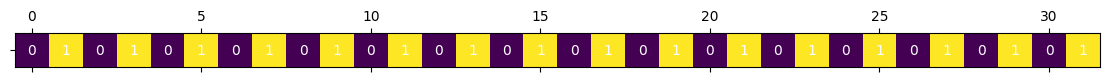

In [2]:
from miniverse.animal import zebra, snake, lion
zebra.to_plt().show()

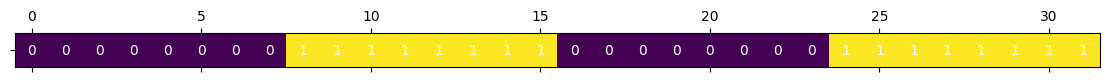

In [3]:
snake.to_plt().show()

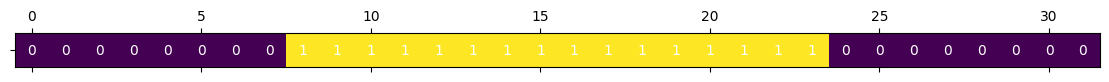

In [4]:
lion.to_plt().show()

## Miniverses

A miniverse is just a sequence of ones and zero. In the example below we create a completely random miniverse. If you lived in such a miniverse, sadly, there would be nothing to learn, since there is nothing to predict.

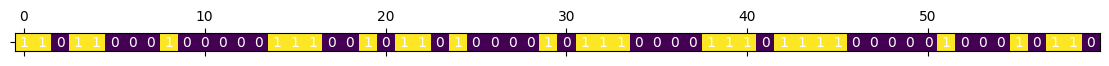

In [5]:
from miniverse.miniverse import Miniverse
random_verse = Miniverse(verse_len=10000, random_seed = 606)
random_verse.to_plt(to_index=60).show()

As slightly more interesting miniverse has animals occurring in it randomly:

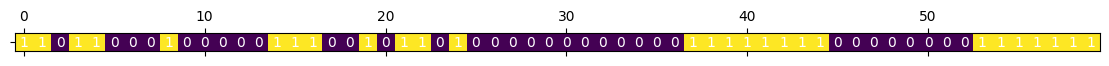

In [6]:
snake.frequency = .7
snake_verse = Miniverse(zoo={'snake': snake}, verse_len=10_000, random_seed = 606)
snake_verse.to_plt(to_index=60).show()

One measure of entropy is compression entropy. We use it here to compare the two universes we created.

In [7]:
from miniverse.entropy import compression_entropy
print(compression_entropy(random_verse.verse))

0.0542


In [8]:
print(compression_entropy(snake_verse.verse))

0.0283


The entropy of the `random_verse` is maximal. The entropy of the `snake_verse` is lower due to the recurring patterns.

## A first prediction

In [9]:
record_output_len = 1
record_input_len = 40
verse_len = 500_000

In [10]:
import tensorflow as tf

In [11]:
model = tf.keras.models.load_model(f'../models/model_{verse_len}_{record_output_len}.keras')

In [12]:
test_verse_kwargs = {'record_output_len': record_output_len,
                     'record_input_len': record_input_len,
                     'random_seed': 606,
                     'verse_len': 126,
                     'animal_position': 'equidistant'}

3/3 [==============================] - 0s 5ms/step


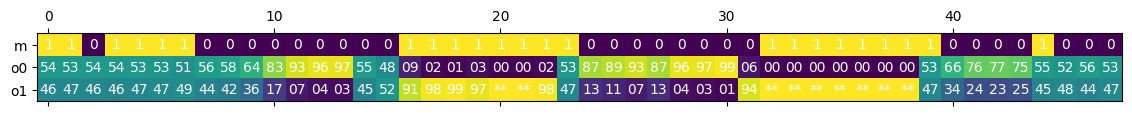

In [13]:
snake.frequency = 0.4
mv_snake = Miniverse(zoo={'snake': snake}, **test_verse_kwargs)
mv_snake.prediction = model.predict(mv_snake.get_input_data())
mv_snake.prediction_to_plt(to_index=48).show()

3/3 [==============================] - 0s 3ms/step


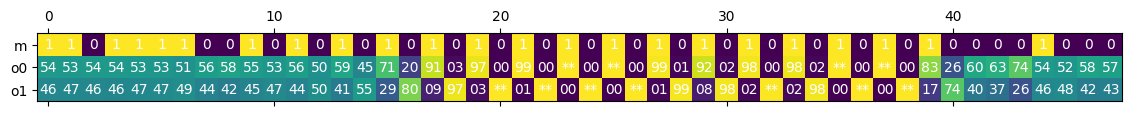

In [14]:
zebra.frequency = 0.4
mv_zebra = Miniverse(zoo={'zebra': zebra}, **test_verse_kwargs)
mv_zebra.prediction = model.predict(mv_zebra.get_input_data())
mv_zebra.prediction_to_plt(to_index=48).show()

3/3 [==============================] - 0s 3ms/step


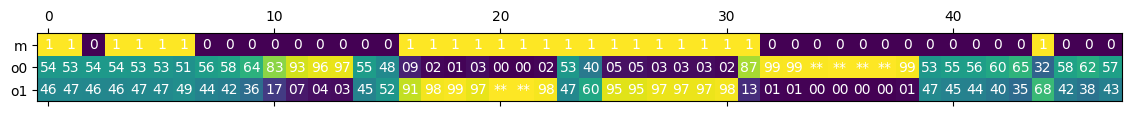

In [15]:
lion.frequency = 0.4
mv_lion = Miniverse(zoo={'lion': lion}, **test_verse_kwargs)
mv_lion.prediction = model.predict(mv_lion.get_input_data())
mv_lion.prediction_to_plt(to_index=48).show()

## Predicting more

In [16]:
record_output_len = 3
model = tf.keras.models.load_model(f'../models/model_{verse_len}_{record_output_len}.keras')
test_verse_kwargs['record_output_len'] = record_output_len

3/3 [==============================] - 0s 3ms/step


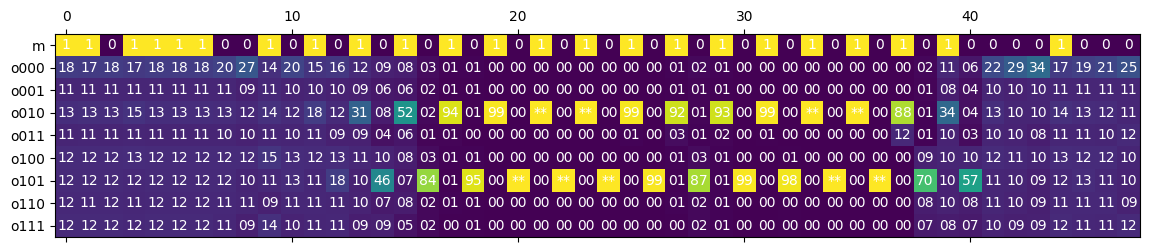

In [17]:
mv_zebra = Miniverse(zoo={'zebra': zebra}, **test_verse_kwargs)
mv_zebra.prediction = model.predict(mv_zebra.get_input_data())
mv_zebra.prediction_to_plt(to_index=48).show()

3/3 [==============================] - 0s 2ms/step


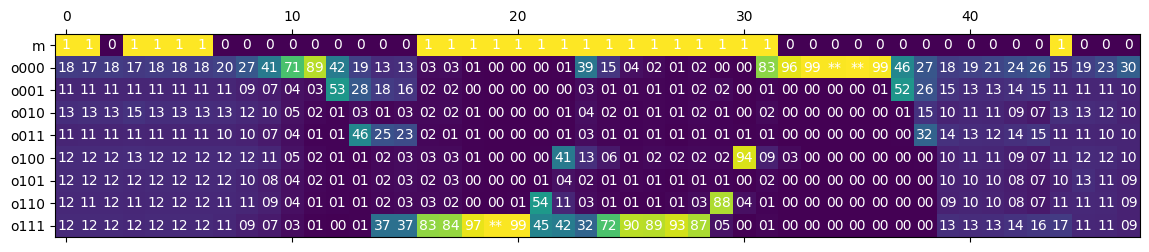

In [18]:
mv_lion = Miniverse(zoo={'lion': lion}, **test_verse_kwargs)
mv_lion.prediction = model.predict(mv_lion.get_input_data())
mv_lion.prediction_to_plt(to_index=48).show()

3/3 [==============================] - 0s 4ms/step


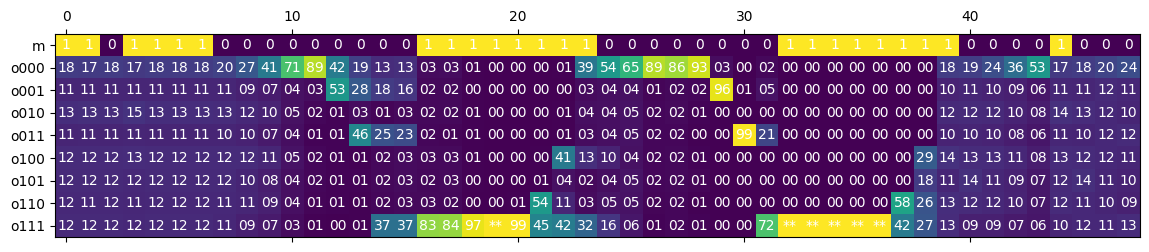

In [19]:
mv_snake = Miniverse(zoo={'snake': snake}, **test_verse_kwargs)
mv_snake.prediction = model.predict(mv_snake.get_input_data())
mv_snake.prediction_to_plt(to_index=48).show()